In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
# open and concat the outputs
final_results_1 = pd.read_csv("final_results_1.csv").drop(columns=["Unnamed: 0"])
final_results_2 = pd.read_csv("final_results_2.csv").drop(columns=["Unnamed: 0"])
final_results_3 = pd.read_csv("final_results_3.csv").drop(columns=["Unnamed: 0"])
final_results_4 = pd.read_csv("final_results_4.csv").drop(columns=["Unnamed: 0"])
final_results_5 = pd.read_csv("final_results_5.csv").drop(columns=["Unnamed: 0"])
final_results_6 = pd.read_csv("final_results_6.csv").drop(columns=["Unnamed: 0"])
final_results_7 = pd.read_csv("final_results_7.csv").drop(columns=["Unnamed: 0"])
final_results_8 = pd.read_csv("final_results_8.csv").drop(columns=["Unnamed: 0"])
final_results_9 = pd.read_csv("final_results_9.csv").drop(columns=["Unnamed: 0"])
final_results_10 = pd.read_csv("final_results_10.csv").drop(columns=["Unnamed: 0"])
final_results_11 = pd.read_csv("final_results_11.csv").drop(columns=["Unnamed: 0"])
final_results_12 = pd.read_csv("final_results_12.csv").drop(columns=["Unnamed: 0"])
final_results_13 = pd.read_csv("final_results_13.csv").drop(columns=["Unnamed: 0"])
final_results_14 = pd.read_csv("final_results_14.csv").drop(columns=["Unnamed: 0"])
final_results_15 = pd.read_csv("final_results_15.csv").drop(columns=["Unnamed: 0"])
final_results_16 = pd.read_csv("final_results_16.csv").drop(columns=["Unnamed: 0"])
final_results_17 = pd.read_csv("final_results_17.csv").drop(columns=["Unnamed: 0"])
final_results_18 = pd.read_csv("final_results_18.csv").drop(columns=["Unnamed: 0"])
final_results_19 = pd.read_csv("final_results_19.csv").drop(columns=["Unnamed: 0"])
final_results_20 = pd.read_csv("final_results_20.csv").drop(columns=["Unnamed: 0"])


# change the run numbers (so no duplicates)
final_results_2['run_number'] = final_results_2['run_number'] + 5_000
final_results_3['run_number'] = final_results_3['run_number'] + 10_000
final_results_4['run_number'] = final_results_4['run_number'] + 15_000
final_results_5['run_number'] = final_results_5['run_number'] + 20_000
final_results_6['run_number'] = final_results_6['run_number'] + 25_000
final_results_7['run_number'] = final_results_7['run_number'] + 30_000
final_results_8['run_number'] = final_results_8['run_number'] + 35_000
final_results_9['run_number'] = final_results_9['run_number'] + 40_000
final_results_10['run_number'] = final_results_10['run_number'] + 45_000
final_results_11['run_number'] = final_results_11['run_number'] + 50_000
final_results_12['run_number'] = final_results_12['run_number'] + 55_000
final_results_13['run_number'] = final_results_13['run_number'] + 60_000
final_results_14['run_number'] = final_results_14['run_number'] + 65_000
final_results_15['run_number'] = final_results_15['run_number'] + 70_000
final_results_16['run_number'] = final_results_16['run_number'] + 75_000
final_results_17['run_number'] = final_results_17['run_number'] + 80_000
final_results_18['run_number'] = final_results_18['run_number'] + 85_000
final_results_19['run_number'] = final_results_19['run_number'] + 90_000
final_results_20['run_number'] = final_results_20['run_number'] + 95_000

dfs = [final_results_1, final_results_2, final_results_3, final_results_4, final_results_5, final_results_6, final_results_7, final_results_8, final_results_9, final_results_10, final_results_11, final_results_12, final_results_13, final_results_14, final_results_15, final_results_16, final_results_17, final_results_18, final_results_19, final_results_20]

FileNotFoundError: [Errno 2] No such file or directory: 'final_results_1.csv'

In [ ]:
final_accepted_results = []
for df in dfs:
    # does it pass the first filters?
    accepted_habs = df.loc[(df['Time'] == 49) & (df['Grassland'] <= 89.9) & (df['Grassland'] >= 26.8) & 
    (df['Thorny Scrub'] <= 51.8) & (df["Thorny Scrub"] >= 4.3) & 
    (df["Woodland"] <= 17) & (df["Woodland"] >= 5.8) &
    (df["Roe deer"] <= 40) & (df["Roe deer"] >= 12)]
    # if yes, save those run numbers
    final_accepted_results.append(list(accepted_habs.run_number))
# flatten the list of lists
final_accepted_results_list = [item for items in final_accepted_results for item in items]

In [ ]:
# now filter the df by those run numbers 
passed_second_filters = []
for df in dfs:
    passed_first_filters = df[df.run_number.isin(final_accepted_results_list)]
    # does it pass the last habitat filters?
    last_year = passed_first_filters.loc[passed_first_filters['Time'] == 183]
    accepted_habs_second = last_year.loc[
    (last_year['Grassland'] <= 36.8) & (last_year['Grassland'] >= 16.8) & 
    (last_year['Thorny Scrub'] <= 61.8) & (last_year["Thorny Scrub"] >= 41.8) & 
    (last_year["Woodland"] <= 31.5) & (last_year["Woodland"] >= 11.5) &
    (last_year["Roe deer"] <= 80) & (last_year["Roe deer"] >= 20)]
    # save the run number
    passed_second_filters.append(list(accepted_habs_second.run_number))
# flatten the list of lists
passed_both_filters = [item for items in passed_second_filters for item in items]

In [ ]:
filtered_df = pd.DataFrame()
# now take the top 100 runs - first find the correct run number in the df 
for df in dfs:
    # take the runs that passed all filters
    passed_all = df[df.run_number.isin(passed_both_filters)]
    # save that 
    filtered_df = filtered_df.append(passed_all)

# choose 1 year (doesn't matter which)
random_year = filtered_df.loc[filtered_df['Time'] == 183]
# take the top 0.1% of those
best_results = random_year.nlargest(100, 'passed_filters')

In [ ]:
boolean = filtered_df['run_number'].isin(best_results['run_number'])
final_accepted_df = filtered_df[boolean]
final_accepted_df["Run Status"] = "Accepted"

/var/folders/w0/r8c1rzh10_l18y1d53q2_vqm0000gn/T/ipykernel_79529/2218574550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_accepted_df["Run Status"] = "Accepted"


In [ ]:
print("min:",best_results["passed_filters"].min()/63)
print("max:",best_results["passed_filters"].max()/63)

min: 0.7142857142857143
max: 0.9523809523809523


In [ ]:
# get representative sample of rejected for graphing 
rejected_runs_sample = final_results_1[~final_results_1.run_number.isin(final_accepted_df)]
rejected_runs_sample['Run Status'] = "Rejected"
# sample 1000 runs - get unique run_id
one_year_rejected = rejected_runs_sample.loc[rejected_runs_sample['Time'] == 184]
sample_rejected = one_year_rejected.sample(n=1000)
# concat the dataframes and save to csv
final_results_combined = pd.concat([final_accepted_df,sample_rejected], axis=0).reset_index(drop=True)

/var/folders/w0/r8c1rzh10_l18y1d53q2_vqm0000gn/T/ipykernel_79529/3094431773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_results_last["passed_filters_perc"] = final_results_last[["passed_filters"]]/63 # show percentage passed


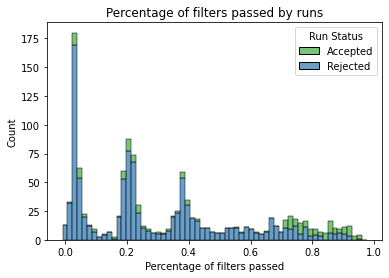

In [ ]:
# graph the number of filters passed
final_results_last = final_results_combined.loc[final_results_combined['Time'] == 184]
final_results_last["passed_filters_perc"] = final_results_last[["passed_filters"]]/63 # show percentage passed

d = np.diff(np.unique(final_results_last[['passed_filters_perc']])).min()
left_of_first_bin = np.unique(final_results_last[['passed_filters_perc']]).min() - float(d)/2
right_of_last_bin = np.unique(final_results_last[['passed_filters_perc']]).max() + float(d)/2

fig, ax = plt.subplots()
sns.histplot(
    data=final_results_last, x='passed_filters_perc', hue='Run Status', multiple='stack',
    ax=ax, palette=["#4daf4a", "#377eb8"], bins=np.arange(left_of_first_bin, right_of_last_bin + d, d)
)
plt.xlabel("Percentage of filters passed")
plt.ylabel("Count")
plt.title("Percentage of filters passed by runs")
plt.show()

In [ ]:
final_df = pd.DataFrame(np.concatenate([np.repeat(final_results_combined['Run Status'], 10)], axis=0), columns=['runType'])
final_df["Abundance %"] = pd.DataFrame(
                (final_results_combined[["Roe deer", "Exmoor pony", "Fallow deer", "Longhorn cattle", "Red deer", "Tamworth pigs", "Grassland","Woodland", "Thorny Scrub","Bare ground"]].values.flatten()))

final_df["runNumber"] = pd.DataFrame(np.concatenate([np.repeat(final_results_combined['run_number'], 10)], axis=0))
final_df["Time"] = pd.DataFrame(np.concatenate([np.repeat(final_results_combined['Time'], 10)], axis=0))
final_df["Ecosystem Element"] = pd.DataFrame(np.tile(["Roe deer", "Exmoor pony", "Fallow deer", "Longhorn cattle", "Red deer", "Tamworth pigs", "Grassland",  "Woodland", "Thorny Scrub", "Bare ground"], len(final_results_combined)))


# calculate median 
m = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])[['Abundance %']].apply(np.median)
m.name = 'Median'
final_df = final_df.join(m, on=['Time', 'runType', 'Ecosystem Element'])
# calculate quantiles - try graphing smaller percentiles on top 
perc1 = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])['Abundance %'].quantile(1) 
perc1.name = 'onehundperc'
final_df = final_df.join(perc1, on=['Time', 'runType', 'Ecosystem Element'])
perc2 = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])['Abundance %'].quantile(0) 
perc2.name = "zeroperc"
final_df = final_df.join(perc2, on=['Time','runType', 'Ecosystem Element'])

# now show more quantiles, 95th
perc3 = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])['Abundance %'].quantile(0.975) 
perc3.name = 'ninetyfiveperc'
final_df = final_df.join(perc3, on=['Time', 'runType', 'Ecosystem Element'])
perc4 = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])['Abundance %'].quantile(0.025)
perc4.name = "fiveperc"
final_df = final_df.join(perc4, on=['Time','runType', 'Ecosystem Element'])
# and 80th
perc5 = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])['Abundance %'].quantile(0.9)
perc5.name = 'eightyperc'
final_df = final_df.join(perc5, on=['Time', 'runType', 'Ecosystem Element'])
perc6 = final_df.groupby(['Time', 'runType', 'Ecosystem Element'])['Abundance %'].quantile(0.1)
perc6.name = "twentyperc"
final_df = final_df.join(perc6, on=['Time','runType', 'Ecosystem Element'])

# reset the index
final_df = final_df.reset_index(drop=True)

In [ ]:
final_df.to_csv('graphing_current.csv')

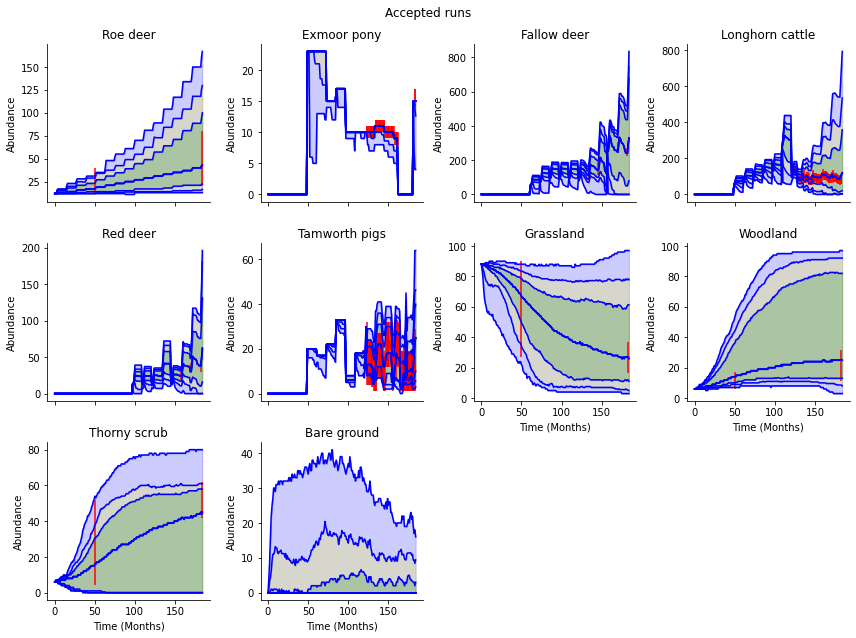

In [ ]:
# graph the accepted outputs - are they acceptable?
palette=['blue', 'yellow', 'green']

# conditions
final_graph = final_df.loc[(final_df['runType'] == "Accepted")]
final_graph = final_graph.reset_index(drop=True)
f = sns.FacetGrid(final_graph, col="Ecosystem Element", hue = "runType", palette = palette, col_wrap=4, sharey = False)
f.map(sns.lineplot, 'Time', 'Median')
f.map(sns.lineplot, 'Time', 'onehundperc')
f.map(sns.lineplot, 'Time', 'zeroperc')
# now other percentiles
f.map(sns.lineplot, 'Time', 'Median')
f.map(sns.lineplot, 'Time', 'ninetyfiveperc')
f.map(sns.lineplot, 'Time', 'fiveperc')
# now other percentiles
f.map(sns.lineplot, 'Time', 'Median')
f.map(sns.lineplot, 'Time', 'eightyperc')
f.map(sns.lineplot, 'Time', 'twentyperc')

for ax in f.axes.flat:
    ax.fill_between(ax.lines[1].get_xdata(),ax.lines[1].get_ydata(), ax.lines[2].get_ydata(),  color="blue",alpha =0.2)
    # 95 perc
    ax.fill_between(ax.lines[4].get_xdata(),ax.lines[4].get_ydata(), ax.lines[5].get_ydata(),  color="yellow",alpha =0.2)
    # 80 perc
    ax.fill_between(ax.lines[7].get_xdata(),ax.lines[7].get_ydata(), ax.lines[8].get_ydata(),  color="green",alpha =0.2)

    ax.set_ylabel('Abundance')
    ax.set_xlabel('Time (Months)')
# add subplot titles
axes = f.axes.flatten()
# fill between the quantiles
axes[0].set_title("Roe deer")
axes[1].set_title("Exmoor pony")
axes[2].set_title("Fallow deer")
axes[3].set_title("Longhorn cattle")
axes[4].set_title("Red deer")
axes[5].set_title("Tamworth pigs")
axes[6].set_title("Grassland")
axes[7].set_title("Woodland")
axes[8].set_title("Thorny scrub")
axes[9].set_title("Bare ground")
# add filter lines
f.axes[0].vlines(x=50,ymin=12,ymax=40, color='r')
f.axes[6].vlines(x=50,ymin=26.8,ymax=89.9, color='r')
f.axes[7].vlines(x=50,ymin=5.8,ymax=17, color='r')
f.axes[8].vlines(x=50,ymin=4.3,ymax=51.8, color='r')
f.axes[1].vlines(x=123,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=123,ymin=90,ymax=140, color='r')
f.axes[5].vlines(x=123,ymin=12,ymax=32, color='r')
# May 2015
f.axes[3].vlines(x=124,ymin=104,ymax=154, color='r')
f.axes[5].vlines(x=124,ymin=4,ymax=24, color='r')
f.axes[1].vlines(x=124,ymin=9,ymax=11, color='r')
# June 2015
f.axes[3].vlines(x=125,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=125,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=125,ymin=4,ymax=24, color='r')
# July 2015
f.axes[3].vlines(x=126,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=126,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=126,ymin=4,ymax=24, color='r')
# Aug 2015
f.axes[3].vlines(x=127,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=127,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=127,ymin=4,ymax=24, color='r')
# Sept 2015
f.axes[3].vlines(x=128,ymin=105,ymax=155, color='r')
f.axes[1].vlines(x=128,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=128,ymin=4,ymax=24, color='r')
# Oct 2015
f.axes[3].vlines(x=129,ymin=66,ymax=116, color='r')
f.axes[1].vlines(x=129,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=129,ymin=4,ymax=24, color='r')
# Nov 2015
f.axes[3].vlines(x=130,ymin=66,ymax=116, color='r')
f.axes[1].vlines(x=130,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=130,ymin=3,ymax=23, color='r')
# Dec 2015
f.axes[3].vlines(x=131,ymin=61,ymax=111, color='r')
f.axes[1].vlines(x=131,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=131,ymin=3,ymax=23, color='r')
# Jan 2016
f.axes[3].vlines(x=132,ymin=61,ymax=111, color='r')
f.axes[1].vlines(x=132,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=132,ymin=1,ymax=20, color='r')
# Feb 2016
f.axes[1].vlines(x=133,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=133,ymin=61,ymax=111, color='r')
f.axes[5].vlines(x=133,ymin=1,ymax=20, color='r')
# March 2016
f.axes[1].vlines(x=134,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=134,ymin=61,ymax=111, color='r')
f.axes[2].vlines(x=134,ymin=90,ymax=190, color='r')
f.axes[4].vlines(x=134,ymin=21,ymax=31, color='r')
f.axes[5].vlines(x=134,ymin=1,ymax=19, color='r')
# April 2016
f.axes[1].vlines(x=135,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=135,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=135,ymin=1,ymax=19, color='r')
# May 2016
f.axes[1].vlines(x=136,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=136,ymin=83,ymax=133, color='r')
f.axes[5].vlines(x=136,ymin=7,ymax=27, color='r')
# June 2016
f.axes[1].vlines(x=137,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=137,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=137,ymin=7,ymax=27, color='r')
# July 2016
f.axes[1].vlines(x=138,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=138,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=138,ymin=7,ymax=27, color='r')
# Aug 2016
f.axes[1].vlines(x=139,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=139,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=139,ymin=7,ymax=27, color='r')
# Sept 2016
f.axes[1].vlines(x=140,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=140,ymin=72,ymax=122, color='r')
f.axes[5].vlines(x=140,ymin=7,ymax=27, color='r')
# Oct 2016
f.axes[1].vlines(x=141,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=141,ymin=72,ymax=122, color='r')
f.axes[5].vlines(x=141,ymin=7,ymax=27, color='r')
# Nov 2016
f.axes[1].vlines(x=142,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=142,ymin=67,ymax=117, color='r')
f.axes[5].vlines(x=142,ymin=7,ymax=27, color='r')
# Dec 2016
f.axes[1].vlines(x=143,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=143,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=143,ymin=3,ymax=23, color='r')
# Jan 2017
f.axes[1].vlines(x=144,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=144,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=144,ymin=1,ymax=19, color='r')
# Feb 2017
f.axes[1].vlines(x=145,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=145,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=145,ymin=1,ymax=17, color='r')
# March 2017
f.axes[1].vlines(x=146,ymin=9,ymax=11, color='r')
f.axes[2].vlines(x=146,ymin=115,ymax=200, color='r')
f.axes[3].vlines(x=146,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=146,ymin=1,ymax=17, color='r')
# April 2017
f.axes[1].vlines(x=147,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=147,ymin=75,ymax=125, color='r')
f.axes[5].vlines(x=147,ymin=12,ymax=32, color='r')
# May 2017
f.axes[1].vlines(x=148,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=148,ymin=84,ymax=134, color='r')
f.axes[5].vlines(x=148,ymin=12,ymax=32, color='r')
# June 2017
f.axes[1].vlines(x=149,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=149,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=149,ymin=12,ymax=32, color='r')
# July 2017
f.axes[1].vlines(x=150,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=150,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=150,ymin=12,ymax=32, color='r')
# Aug 2017
f.axes[1].vlines(x=151,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=151,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=151,ymin=12,ymax=32, color='r')
# Sept 2017
f.axes[1].vlines(x=152,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=152,ymin=65,ymax=115, color='r')
f.axes[5].vlines(x=152,ymin=20,ymax=24, color='r')
# Oct 2017
f.axes[1].vlines(x=153,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=153,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=153,ymin=12,ymax=32, color='r')
# Nov 2017
f.axes[1].vlines(x=154,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=154,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=154,ymin=12,ymax=32, color='r')
# Dec 2017
f.axes[1].vlines(x=155,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=155,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=155,ymin=8,ymax=28, color='r')
# Jan 2018
f.axes[1].vlines(x=156,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=156,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=156,ymin=1,ymax=21, color='r')
# Feb 2018
f.axes[1].vlines(x=157,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=157,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=157,ymin=6,ymax=26, color='r')
# March 2018
f.axes[1].vlines(x=158,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=158,ymin=63,ymax=113, color='r')
f.axes[4].vlines(x=158,ymin=19,ymax=29, color='r')
f.axes[5].vlines(x=158,ymin=6,ymax=26, color='r')
# April 2018
f.axes[1].vlines(x=159,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=159,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=159,ymin=6,ymax=26, color='r')
# May 2018
f.axes[1].vlines(x=160,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=160,ymin=92,ymax=142, color='r')
f.axes[5].vlines(x=160,ymin=13,ymax=33, color='r')
# June 2018
f.axes[1].vlines(x=161,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=161,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=161,ymin=13,ymax=33, color='r')
# July 2018
f.axes[1].vlines(x=162,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=162,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=162,ymin=12,ymax=32, color='r')
# Aug 2018
f.axes[3].vlines(x=163,ymin=77,ymax=127, color='r')
f.axes[5].vlines(x=163,ymin=12,ymax=32, color='r')
# Sept 2018
f.axes[3].vlines(x=164,ymin=81,ymax=131, color='r')
f.axes[5].vlines(x=164,ymin=12,ymax=32, color='r')
# Oct 2018
f.axes[3].vlines(x=165,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=165,ymin=11,ymax=31, color='r')
# Nov 2018
f.axes[3].vlines(x=166,ymin=68,ymax=118, color='r')
f.axes[5].vlines(x=166,ymin=1,ymax=19, color='r')
# Dec 2018
f.axes[3].vlines(x=167,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=167,ymin=1,ymax=19, color='r')
# Jan 2019
f.axes[3].vlines(x=168,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=168,ymin=1,ymax=19, color='r')
# Feb 2019
f.axes[3].vlines(x=169,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=169,ymin=1,ymax=20, color='r')
# March 2019
f.axes[2].vlines(x=170,ymin=253,ymax=303, color='r')
f.axes[3].vlines(x=170,ymin=62,ymax=112, color='r')
f.axes[4].vlines(x=170,ymin=32,ymax=42, color='r')
f.axes[5].vlines(x=170,ymin=1,ymax=19, color='r')
# April 2019
f.axes[3].vlines(x=171,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=171,ymin=1,ymax=18, color='r')
# May 2019
f.axes[3].vlines(x=172,ymin=85,ymax=135, color='r')
f.axes[5].vlines(x=172,ymin=1,ymax=18, color='r')
# June 2019
f.axes[3].vlines(x=173,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=173,ymin=1,ymax=18, color='r')
# July 2019
f.axes[3].vlines(x=174,ymin=66,ymax=116, color='r')
f.axes[5].vlines(x=174,ymin=1,ymax=19, color='r')
# Aug 2019
f.axes[3].vlines(x=175,ymin=66,ymax=116, color='r')
f.axes[5].vlines(x=175,ymin=1,ymax=19, color='r')  
# Sept 2019
f.axes[3].vlines(x=176,ymin=68,ymax=118, color='r')
f.axes[5].vlines(x=176,ymin=1,ymax=19, color='r')
# Oct 2019
f.axes[3].vlines(x=177,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=177,ymin=1,ymax=19, color='r')
# Nov 2019
f.axes[3].vlines(x=178,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=178,ymin=1,ymax=19, color='r')
# Dec 2019
f.axes[3].vlines(x=179,ymin=55,ymax=105, color='r')
f.axes[5].vlines(x=179,ymin=1,ymax=20, color='r')
# Jan 2020
f.axes[3].vlines(x=180,ymin=55,ymax=105, color='r')
f.axes[5].vlines(x=180,ymin=1,ymax=20, color='r')
# Feb 2020
f.axes[3].vlines(x=181,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=181,ymin=1,ymax=18, color='r')
# March 2020
f.axes[2].vlines(x=182,ymin=222,ymax=272, color='r')
f.axes[4].vlines(x=182,ymin=30,ymax=40, color='r')
f.axes[3].vlines(x=182,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=182,ymin=1,ymax=17, color='r')
# April 2020
f.axes[1].vlines(x=183,ymin=14,ymax=17, color='r')
f.axes[3].vlines(x=183,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=183,ymin=1,ymax=17, color='r')
# plot next set of filter lines
f.axes[0].vlines(x=183,ymin=20,ymax=80, color='r')
f.axes[1].vlines(x=183,ymin=14,ymax=17, color='r')
f.axes[3].vlines(x=183,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=183,ymin=9,ymax=29, color='r')
f.axes[6].vlines(x=183,ymin=16.8,ymax=36.8, color='r')
f.axes[7].vlines(x=183,ymin=11.5,ymax=31.5, color='r')
f.axes[8].vlines(x=183,ymin=41.8,ymax=61.8, color='r')

# stop the plots from overlapping
f.fig.suptitle('Accepted runs')
plt.tight_layout()
plt.show()

### What does the best run look like?

       Time  Roe deer  Exmoor pony  Longhorn cattle  Fallow deer  Red deer  \
11346     0        12            0                0            0         0   
11347     0        12            0                0            0         0   
11348     1        12            0                0            0         0   
11349     2        12            0                0            0         0   
11350     3        12            0                0            0         0   
...     ...       ...          ...              ...          ...       ...   
18781   180        69            0               55           60        27   
18782   181        69           15               56           60        27   
18783   182        69           15               65           60        27   
18784   183        71           15               73           78        35   
18785   184        73           15               92          100        49   

       Tamworth pigs  European bison  European elk  Reindeer  .

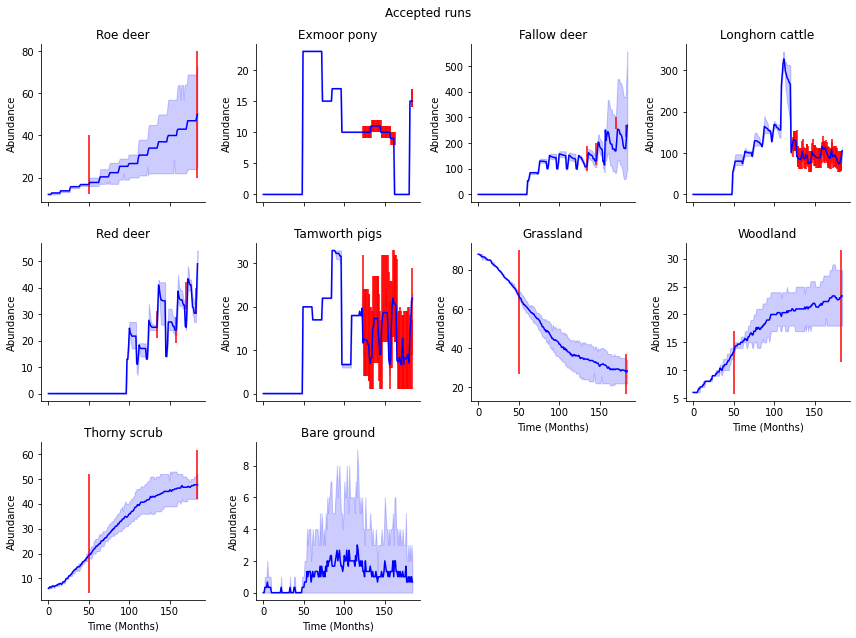

In [ ]:
accepted_runs = final_results_combined.loc[(final_results_combined['Run Status'] == "Accepted")]


maximum_perc = (best_results["passed_filters"]).max()
best_run = accepted_runs.loc[accepted_runs["passed_filters"] == maximum_perc]
print(best_run)

final_df = pd.DataFrame(np.concatenate([np.repeat(best_run['Run Status'], 10)], axis=0), columns=['runType'])
final_df["Abundance %"] = pd.DataFrame(
                (best_run[["Roe deer", "Exmoor pony", "Fallow deer", "Longhorn cattle", "Red deer", "Tamworth pigs", "Grassland","Woodland", "Thorny Scrub","Bare ground"]].values.flatten()))

final_df["runNumber"] = pd.DataFrame(np.concatenate([np.repeat(best_run['run_number'], 10)], axis=0))
final_df["Time"] = pd.DataFrame(np.concatenate([np.repeat(best_run['Time'], 10)], axis=0))
final_df["Ecosystem Element"] = pd.DataFrame(np.tile(["Roe deer", "Exmoor pony", "Fallow deer", "Longhorn cattle", "Red deer", "Tamworth pigs", "Grassland",  "Woodland", "Thorny Scrub", "Bare ground"], len(best_run)))

# graph the accepted outputs - are they acceptable?
palette=['blue', 'yellow', 'green']

# conditions
final_graph = final_df.loc[(final_df['runType'] == "Accepted")]
final_graph = final_graph.reset_index(drop=True)

f = sns.FacetGrid(final_graph, col="Ecosystem Element", hue = "runType", palette = palette, col_wrap=4, sharey = False)
f.map(sns.lineplot, 'Time', 'Abundance %')


for ax in f.axes.flat:
    ax.set_ylabel('Abundance')
    ax.set_xlabel('Time (Months)')
# add subplot titles
axes = f.axes.flatten()
# fill between the quantiles
axes[0].set_title("Roe deer")
axes[1].set_title("Exmoor pony")
axes[2].set_title("Fallow deer")
axes[3].set_title("Longhorn cattle")
axes[4].set_title("Red deer")
axes[5].set_title("Tamworth pigs")
axes[6].set_title("Grassland")
axes[7].set_title("Woodland")
axes[8].set_title("Thorny scrub")
axes[9].set_title("Bare ground")
# add filter lines
f.axes[0].vlines(x=50,ymin=12,ymax=40, color='r')
f.axes[6].vlines(x=50,ymin=26.8,ymax=89.9, color='r')
f.axes[7].vlines(x=50,ymin=5.8,ymax=17, color='r')
f.axes[8].vlines(x=50,ymin=4.3,ymax=51.8, color='r')
f.axes[1].vlines(x=123,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=123,ymin=90,ymax=140, color='r')
f.axes[5].vlines(x=123,ymin=12,ymax=32, color='r')
# May 2015
f.axes[3].vlines(x=124,ymin=104,ymax=154, color='r')
f.axes[5].vlines(x=124,ymin=4,ymax=24, color='r')
f.axes[1].vlines(x=124,ymin=9,ymax=11, color='r')
# June 2015
f.axes[3].vlines(x=125,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=125,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=125,ymin=4,ymax=24, color='r')
# July 2015
f.axes[3].vlines(x=126,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=126,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=126,ymin=4,ymax=24, color='r')
# Aug 2015
f.axes[3].vlines(x=127,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=127,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=127,ymin=4,ymax=24, color='r')
# Sept 2015
f.axes[3].vlines(x=128,ymin=105,ymax=155, color='r')
f.axes[1].vlines(x=128,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=128,ymin=4,ymax=24, color='r')
# Oct 2015
f.axes[3].vlines(x=129,ymin=66,ymax=116, color='r')
f.axes[1].vlines(x=129,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=129,ymin=4,ymax=24, color='r')
# Nov 2015
f.axes[3].vlines(x=130,ymin=66,ymax=116, color='r')
f.axes[1].vlines(x=130,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=130,ymin=3,ymax=23, color='r')
# Dec 2015
f.axes[3].vlines(x=131,ymin=61,ymax=111, color='r')
f.axes[1].vlines(x=131,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=131,ymin=3,ymax=23, color='r')
# Jan 2016
f.axes[3].vlines(x=132,ymin=61,ymax=111, color='r')
f.axes[1].vlines(x=132,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=132,ymin=1,ymax=20, color='r')
# Feb 2016
f.axes[1].vlines(x=133,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=133,ymin=61,ymax=111, color='r')
f.axes[5].vlines(x=133,ymin=1,ymax=20, color='r')
# March 2016
f.axes[1].vlines(x=134,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=134,ymin=61,ymax=111, color='r')
f.axes[2].vlines(x=134,ymin=90,ymax=190, color='r')
f.axes[4].vlines(x=134,ymin=21,ymax=31, color='r')
f.axes[5].vlines(x=134,ymin=1,ymax=19, color='r')
# April 2016
f.axes[1].vlines(x=135,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=135,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=135,ymin=1,ymax=19, color='r')
# May 2016
f.axes[1].vlines(x=136,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=136,ymin=83,ymax=133, color='r')
f.axes[5].vlines(x=136,ymin=7,ymax=27, color='r')
# June 2016
f.axes[1].vlines(x=137,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=137,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=137,ymin=7,ymax=27, color='r')
# July 2016
f.axes[1].vlines(x=138,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=138,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=138,ymin=7,ymax=27, color='r')
# Aug 2016
f.axes[1].vlines(x=139,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=139,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=139,ymin=7,ymax=27, color='r')
# Sept 2016
f.axes[1].vlines(x=140,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=140,ymin=72,ymax=122, color='r')
f.axes[5].vlines(x=140,ymin=7,ymax=27, color='r')
# Oct 2016
f.axes[1].vlines(x=141,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=141,ymin=72,ymax=122, color='r')
f.axes[5].vlines(x=141,ymin=7,ymax=27, color='r')
# Nov 2016
f.axes[1].vlines(x=142,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=142,ymin=67,ymax=117, color='r')
f.axes[5].vlines(x=142,ymin=7,ymax=27, color='r')
# Dec 2016
f.axes[1].vlines(x=143,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=143,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=143,ymin=3,ymax=23, color='r')
# Jan 2017
f.axes[1].vlines(x=144,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=144,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=144,ymin=1,ymax=19, color='r')
# Feb 2017
f.axes[1].vlines(x=145,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=145,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=145,ymin=1,ymax=17, color='r')
# March 2017
f.axes[1].vlines(x=146,ymin=9,ymax=11, color='r')
f.axes[2].vlines(x=146,ymin=115,ymax=200, color='r')
f.axes[3].vlines(x=146,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=146,ymin=1,ymax=17, color='r')
# April 2017
f.axes[1].vlines(x=147,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=147,ymin=75,ymax=125, color='r')
f.axes[5].vlines(x=147,ymin=12,ymax=32, color='r')
# May 2017
f.axes[1].vlines(x=148,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=148,ymin=84,ymax=134, color='r')
f.axes[5].vlines(x=148,ymin=12,ymax=32, color='r')
# June 2017
f.axes[1].vlines(x=149,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=149,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=149,ymin=12,ymax=32, color='r')
# July 2017
f.axes[1].vlines(x=150,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=150,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=150,ymin=12,ymax=32, color='r')
# Aug 2017
f.axes[1].vlines(x=151,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=151,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=151,ymin=12,ymax=32, color='r')
# Sept 2017
f.axes[1].vlines(x=152,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=152,ymin=65,ymax=115, color='r')
f.axes[5].vlines(x=152,ymin=20,ymax=24, color='r')
# Oct 2017
f.axes[1].vlines(x=153,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=153,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=153,ymin=12,ymax=32, color='r')
# Nov 2017
f.axes[1].vlines(x=154,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=154,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=154,ymin=12,ymax=32, color='r')
# Dec 2017
f.axes[1].vlines(x=155,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=155,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=155,ymin=8,ymax=28, color='r')
# Jan 2018
f.axes[1].vlines(x=156,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=156,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=156,ymin=1,ymax=21, color='r')
# Feb 2018
f.axes[1].vlines(x=157,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=157,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=157,ymin=6,ymax=26, color='r')
# March 2018
f.axes[1].vlines(x=158,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=158,ymin=63,ymax=113, color='r')
f.axes[4].vlines(x=158,ymin=19,ymax=29, color='r')
f.axes[5].vlines(x=158,ymin=6,ymax=26, color='r')
# April 2018
f.axes[1].vlines(x=159,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=159,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=159,ymin=6,ymax=26, color='r')
# May 2018
f.axes[1].vlines(x=160,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=160,ymin=92,ymax=142, color='r')
f.axes[5].vlines(x=160,ymin=13,ymax=33, color='r')
# June 2018
f.axes[1].vlines(x=161,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=161,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=161,ymin=13,ymax=33, color='r')
# July 2018
f.axes[1].vlines(x=162,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=162,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=162,ymin=12,ymax=32, color='r')
# Aug 2018
f.axes[3].vlines(x=163,ymin=77,ymax=127, color='r')
f.axes[5].vlines(x=163,ymin=12,ymax=32, color='r')
# Sept 2018
f.axes[3].vlines(x=164,ymin=81,ymax=131, color='r')
f.axes[5].vlines(x=164,ymin=12,ymax=32, color='r')
# Oct 2018
f.axes[3].vlines(x=165,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=165,ymin=11,ymax=31, color='r')
# Nov 2018
f.axes[3].vlines(x=166,ymin=68,ymax=118, color='r')
f.axes[5].vlines(x=166,ymin=1,ymax=19, color='r')
# Dec 2018
f.axes[3].vlines(x=167,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=167,ymin=1,ymax=19, color='r')
# Jan 2019
f.axes[3].vlines(x=168,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=168,ymin=1,ymax=19, color='r')
# Feb 2019
f.axes[3].vlines(x=169,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=169,ymin=1,ymax=20, color='r')
# March 2019
f.axes[2].vlines(x=170,ymin=253,ymax=303, color='r')
f.axes[3].vlines(x=170,ymin=62,ymax=112, color='r')
f.axes[4].vlines(x=170,ymin=32,ymax=42, color='r')
f.axes[5].vlines(x=170,ymin=1,ymax=19, color='r')
# April 2019
f.axes[3].vlines(x=171,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=171,ymin=1,ymax=18, color='r')
# May 2019
f.axes[3].vlines(x=172,ymin=85,ymax=135, color='r')
f.axes[5].vlines(x=172,ymin=1,ymax=18, color='r')
# June 2019
f.axes[3].vlines(x=173,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=173,ymin=1,ymax=18, color='r')
# July 2019
f.axes[3].vlines(x=174,ymin=66,ymax=116, color='r')
f.axes[5].vlines(x=174,ymin=1,ymax=19, color='r')
# Aug 2019
f.axes[3].vlines(x=175,ymin=66,ymax=116, color='r')
f.axes[5].vlines(x=175,ymin=1,ymax=19, color='r')  
# Sept 2019
f.axes[3].vlines(x=176,ymin=68,ymax=118, color='r')
f.axes[5].vlines(x=176,ymin=1,ymax=19, color='r')
# Oct 2019
f.axes[3].vlines(x=177,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=177,ymin=1,ymax=19, color='r')
# Nov 2019
f.axes[3].vlines(x=178,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=178,ymin=1,ymax=19, color='r')
# Dec 2019
f.axes[3].vlines(x=179,ymin=55,ymax=105, color='r')
f.axes[5].vlines(x=179,ymin=1,ymax=20, color='r')
# Jan 2020
f.axes[3].vlines(x=180,ymin=55,ymax=105, color='r')
f.axes[5].vlines(x=180,ymin=1,ymax=20, color='r')
# Feb 2020
f.axes[3].vlines(x=181,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=181,ymin=1,ymax=18, color='r')
# March 2020
f.axes[2].vlines(x=182,ymin=222,ymax=272, color='r')
f.axes[4].vlines(x=182,ymin=30,ymax=40, color='r')
f.axes[3].vlines(x=182,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=182,ymin=1,ymax=17, color='r')
# April 2020
f.axes[1].vlines(x=183,ymin=14,ymax=17, color='r')
f.axes[3].vlines(x=183,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=183,ymin=1,ymax=17, color='r')
# plot next set of filter lines
f.axes[0].vlines(x=183,ymin=20,ymax=80, color='r')
f.axes[1].vlines(x=183,ymin=14,ymax=17, color='r')
f.axes[3].vlines(x=183,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=183,ymin=9,ymax=29, color='r')
f.axes[6].vlines(x=183,ymin=16.8,ymax=36.8, color='r')
f.axes[7].vlines(x=183,ymin=11.5,ymax=31.5, color='r')
f.axes[8].vlines(x=183,ymin=41.8,ymax=61.8, color='r')

# stop the plots from overlapping
f.fig.suptitle('Accepted runs')
plt.tight_layout()
plt.show()

### What are the distributions of accepted parameters?

In [ ]:
# open and concat the outputs (120k)
params_1 = pd.read_csv("all_parameters_1.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce", "tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast", "european_bison_reproduce",	"european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_2 = pd.read_csv("all_parameters_2.csv").drop(columns=["Unnamed: 0","initial_roe","european_bison_reproduce", "tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast", "european_bison_reproduce",	"european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_3 = pd.read_csv("all_parameters_3.csv").drop(columns=["Unnamed: 0", "initial_roe","european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_4 = pd.read_csv("all_parameters_4.csv").drop(columns=["Unnamed: 0", "initial_roe","european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_5 = pd.read_csv("all_parameters_5.csv").drop(columns=["Unnamed: 0", "initial_roe","european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_6 = pd.read_csv("all_parameters_6.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_7 = pd.read_csv("all_parameters_7.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_8 = pd.read_csv("all_parameters_8.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_9 = pd.read_csv("all_parameters_9.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_10 = pd.read_csv("all_parameters_10.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_11 = pd.read_csv("all_parameters_11.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_12 = pd.read_csv("all_parameters_12.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_13 = pd.read_csv("all_parameters_13.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_14 = pd.read_csv("all_parameters_14.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_15 = pd.read_csv("all_parameters_15.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_16 = pd.read_csv("all_parameters_16.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_17 = pd.read_csv("all_parameters_17.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_18 = pd.read_csv("all_parameters_18.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_19 = pd.read_csv("all_parameters_19.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])
params_20 = pd.read_csv("all_parameters_20.csv").drop(columns=["Unnamed: 0","initial_roe", "european_bison_reproduce",	"tamworthPig_stocking", "redDeer_stocking_forecast", "tamworthPig_stocking_forecast","exmoor_stocking_forecast", "introduced_species_stocking_forecast","european_bison_gain_from_grass", "european_bison_gain_from_trees","european_bison_gain_from_scrub","european_bison_gain_from_saplings","european_bison_gain_from_young_scrub","european_elk_reproduce","european_elk_gain_from_grass","european_elk_gain_from_trees","european_elk_gain_from_scrub", "european_elk_gain_from_young_scrub", "european_elk_gain_from_saplings","reindeer_reproduce","reindeer_gain_from_grass","reindeer_gain_from_trees",	"reindeer_gain_from_scrub",	"reindeer_gain_from_saplings",	"reindeer_gain_from_young_scrub", "fallowDeer_stocking", "cattle_stocking", "redDeer_stocking", "exmoor_stocking",	"fallowDeer_stocking_forecast",	"cattle_stocking_forecast"])

# change the run numbers (so no duplicates) - these have 10k runs
params_2['run_number'] = params_2['run_number'] + 5_000
params_3['run_number'] = params_3['run_number'] + 10_000
params_4['run_number'] = params_4['run_number'] + 15_000
params_5['run_number'] = params_5['run_number'] + 20_000
params_6['run_number'] = params_6['run_number'] + 25_000
params_7['run_number'] = params_7['run_number'] + 30_000
params_8['run_number'] = params_8['run_number'] + 35_000
params_9['run_number'] = params_9['run_number'] + 40_000
params_10['run_number'] = params_10['run_number'] + 45_000
params_11['run_number'] = params_11['run_number'] + 50_000
params_12['run_number'] = params_12['run_number'] + 55_000
params_13['run_number'] = params_13['run_number'] + 60_000
params_14['run_number'] = params_14['run_number'] + 65_000
params_15['run_number'] = params_15['run_number'] + 70_000
params_16['run_number'] = params_16['run_number'] + 75_000
params_17['run_number'] = params_17['run_number'] + 80_000
params_18['run_number'] = params_18['run_number'] + 85_000
params_19['run_number'] = params_19['run_number'] + 90_000
params_20['run_number'] = params_20['run_number'] + 95_000


dfs_params = pd.concat([params_1, params_2, params_3, params_4, params_5, params_6, params_7, params_8, params_9, params_10, params_11, params_12, params_13, params_14, params_15, params_16, params_17, params_18, params_19, params_20]).reset_index(drop=True)

In [ ]:
# which ones were accepted? 
accepted_params = dfs_params[dfs_params.run_number.isin(best_results['run_number'])]
accepted_params = accepted_params.reset_index(drop=True)

In [ ]:
accepted_params

,roe_deer_reproduce,roe_deer_gain_from_saplings,roe_deer_gain_from_trees,roe_deer_gain_from_scrub,roe_deer_gain_from_young_scrub,roe_deer_gain_from_grass,chance_youngScrubMatures,chance_saplingBecomingTree,chance_reproduceSapling,chance_reproduceYoungScrub,...,red_deer_gain_from_young_scrub,red_deer_gain_from_grass,tamworth_pig_reproduce,tamworth_pig_gain_from_saplings,tamworth_pig_gain_from_trees,tamworth_pig_gain_from_scrub,tamworth_pig_gain_from_young_scrub,tamworth_pig_gain_from_grass,chance_scrub_saves_saplings,run_number
0,0.059383,0.040770,0.088969,0.145810,0.002958,0.927451,0.010215,0.004515,0.012824,0.049781,...,0.036628,0.951530,0.594647,0.006675,0.011505,0.180951,0.073143,0.263877,0.541644,188
1,0.073241,0.035829,0.034807,0.260328,0.040934,0.680479,0.013925,0.001765,0.010827,0.066788,...,0.086694,0.097687,0.423774,0.097865,0.073590,0.242802,0.066394,0.106252,0.668964,1889
2,0.057510,0.012721,0.279060,0.094342,0.061265,0.313282,0.024730,0.001767,0.019466,0.059197,...,0.088099,0.067464,0.029277,0.064311,0.296612,0.065001,0.050358,0.853183,0.199831,2921
3,0.022560,0.041800,0.256927,0.136735,0.010580,0.215982,0.019747,0.001958,0.018851,0.053258,...,0.081011,0.773395,0.263248,0.077799,0.011637,0.011535,0.062194,0.343945,0.377978,2944
4,0.041712,0.092289,0.218635,0.140403,0.086233,0.569491,0.024179,0.006995,0.006913,0.065810,...,0.057096,0.598234,0.339229,0.027720,0.139680,0.187740,0.077010,0.887353,0.979386,5559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.077522,0.044922,0.074290,0.309328,0.017343,0.888246,0.021380,0.003368,0.002563,0.067924,...,0.064563,0.527044,0.581332,0.063590,0.178946,0.185760,0.076221,0.814482,0.074748,48684
182,0.046683,0.026018,0.162802,0.085236,0.018319,0.295047,0.022611,0.006750,0.007086,0.061622,...,0.088663,0.067949,0.644601,0.038288,0.160438,0.286919,0.034809,0.225285,0.132914,49545
183,0.124204,0.041819,0.294698,0.308874,0.041057,0.519314,0.022260,0.006613,0.023703,0.060866,...,0.009741,0.354097,0.020488,0.077272,0.293459,0.266206,0.048744,0.580368,0.058018,49701
184,0.036240,0.038210,0.321774,0.282817,0.090084,0.527664,0.018336,0.002586,0.019443,0.064689,...,0.078159,0.677111,0.197100,0.050832,0.229695,0.198330,0.089644,0.486508,0.127893,50282


In [ ]:
# save the output to a csv
accepted_params.to_csv('combined_accepted_parameters.csv')

/var/folders/w0/r8c1rzh10_l18y1d53q2_vqm0000gn/T/ipykernel_79529/2554904913.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  accepted_params.hist(ax=axis)


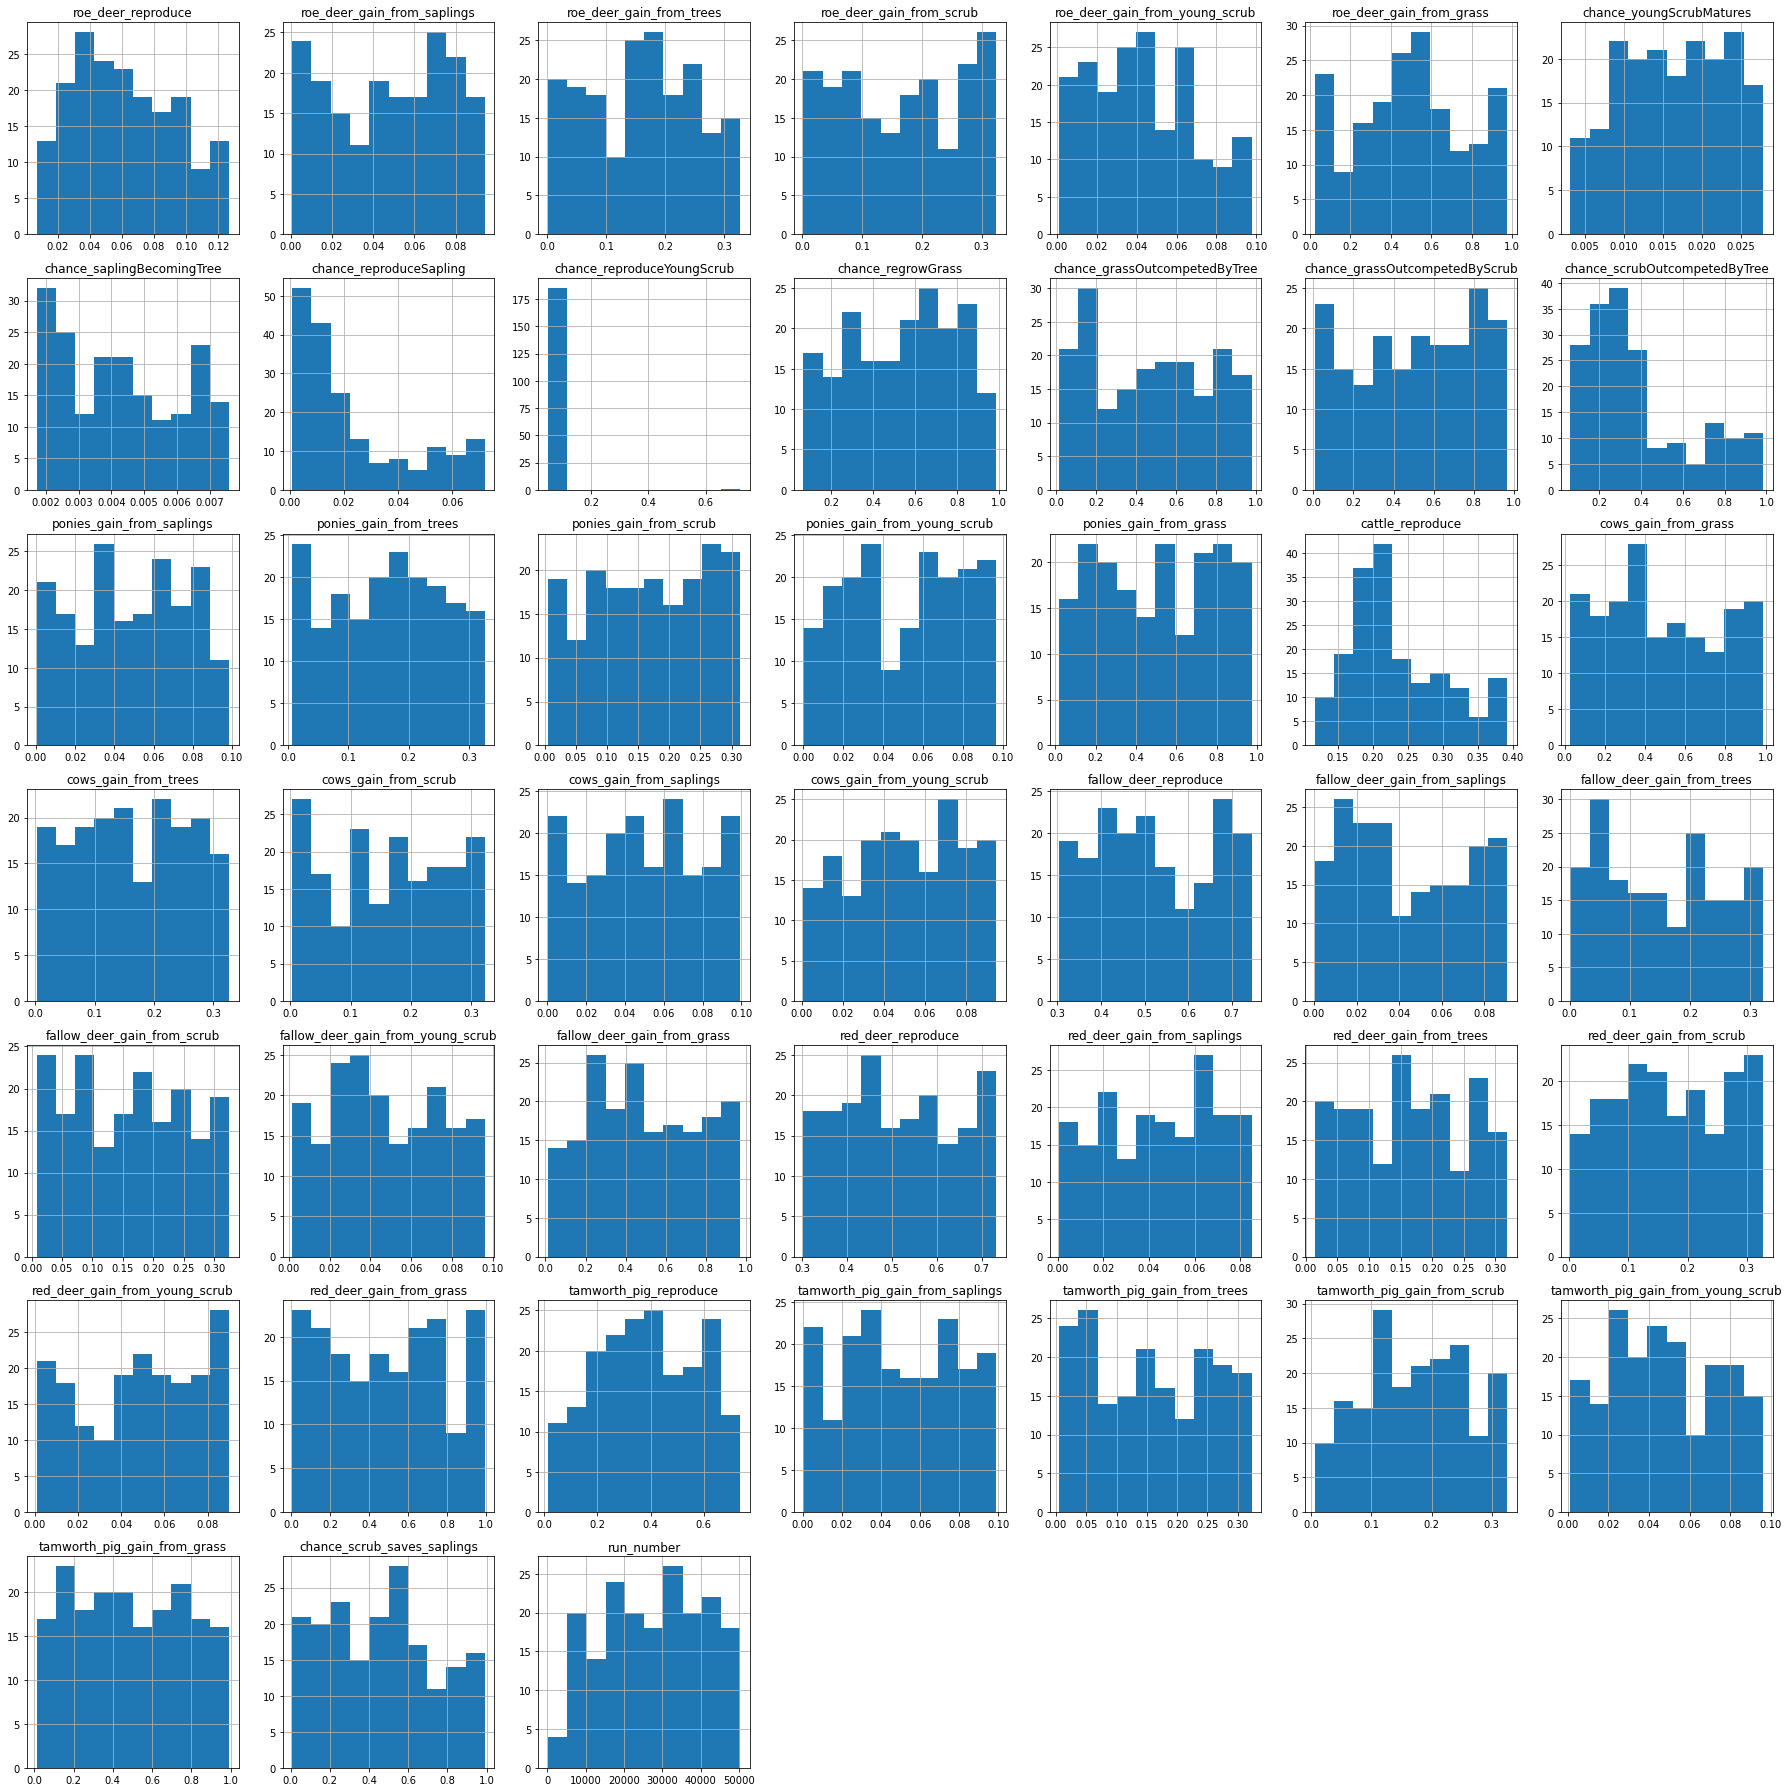

In [ ]:
# show where the best fit params are in the histograms
fig, axis = plt.subplots(figsize=(25, 25))
# accepted_params.hist(ax=axis, range=[0,1]) # no ranges specified
accepted_params.hist(ax=axis)

fig.tight_layout() 

### Difficult filters

In [ ]:
# open the parameter files
difficult_filters_1 = pd.read_csv("difficult_filters_1.csv")
difficult_filters_2 = pd.read_csv("difficult_filters_2.csv")
difficult_filters_3 = pd.read_csv("difficult_filters_3.csv")
difficult_filters_4 = pd.read_csv("difficult_filters_4.csv")
difficult_filters_5 = pd.read_csv("difficult_filters_5.csv")
difficult_filters_6 = pd.read_csv("difficult_filters_6.csv")
difficult_filters_7 = pd.read_csv("difficult_filters_7.csv")
difficult_filters_8 = pd.read_csv("difficult_filters_8.csv")
difficult_filters_9 = pd.read_csv("difficult_filters_9.csv")
difficult_filters_10 = pd.read_csv("difficult_filters_10.csv")

df_filters = pd.concat([difficult_filters_1, difficult_filters_2, difficult_filters_3, difficult_filters_4, difficult_filters_5, difficult_filters_6, difficult_filters_7, difficult_filters_8, difficult_filters_9, difficult_filters_10], axis=0).drop(columns="Unnamed: 0")

In [ ]:
# divide the number of times passed by the total number of runs
cleaned_filters = df_filters.groupby("filter_number").sum()/100_000

In [ ]:
cleaned_filters.loc[cleaned_filters['times_passed'] < 0.01] * 100

,times_passed
filter_number,
60,0.162
62,0.056


### Correlation matrix

In [ ]:
c = accepted_params.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[1970:1985])

chance_regrowGrass                 red_deer_gain_from_grass             0.214808
red_deer_gain_from_grass           chance_regrowGrass                   0.214808
roe_deer_gain_from_young_scrub     fallow_deer_gain_from_young_scrub    0.229103
fallow_deer_gain_from_young_scrub  roe_deer_gain_from_young_scrub       0.229103
chance_regrowGrass                 cows_gain_from_scrub                 0.235620
cows_gain_from_scrub               chance_regrowGrass                   0.235620
fallow_deer_reproduce              chance_reproduceSapling              0.239963
chance_reproduceSapling            fallow_deer_reproduce                0.239963
                                   chance_scrubOutcompetedByTree        0.326116
chance_scrubOutcompetedByTree      chance_reproduceSapling              0.326116
roe_deer_reproduce                 roe_deer_reproduce                   1.000000
cows_gain_from_scrub               cows_gain_from_scrub                 1.000000
tamworth_pig_gain_from_grass

<AxesSubplot:>

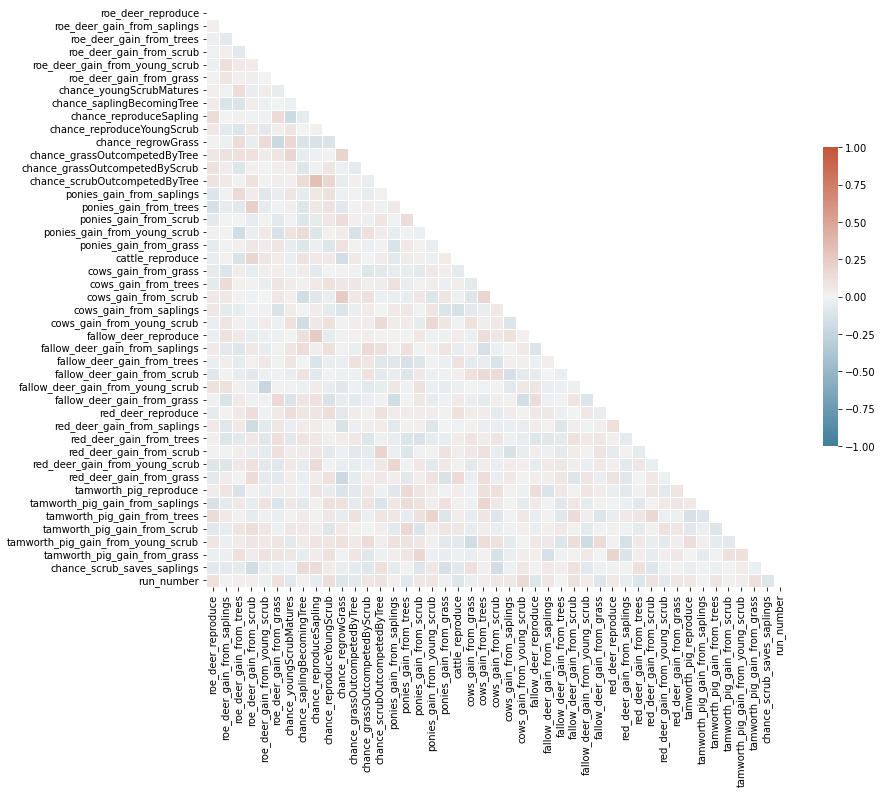

In [ ]:
corr = accepted_params.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
accepted_params.sort_values("run_number")

,roe_deer_reproduce,roe_deer_gain_from_saplings,roe_deer_gain_from_trees,roe_deer_gain_from_scrub,roe_deer_gain_from_young_scrub,roe_deer_gain_from_grass,chance_youngScrubMatures,chance_saplingBecomingTree,chance_reproduceSapling,chance_reproduceYoungScrub,...,red_deer_gain_from_young_scrub,red_deer_gain_from_grass,tamworth_pig_reproduce,tamworth_pig_gain_from_saplings,tamworth_pig_gain_from_trees,tamworth_pig_gain_from_scrub,tamworth_pig_gain_from_young_scrub,tamworth_pig_gain_from_grass,chance_scrub_saves_saplings,run_number
0,0.059383,0.040770,0.088969,0.145810,0.002958,0.927451,0.010215,0.004515,0.012824,0.049781,...,0.036628,0.951530,0.594647,0.006675,0.011505,0.180951,0.073143,0.263877,0.541644,188
1,0.073241,0.035829,0.034807,0.260328,0.040934,0.680479,0.013925,0.001765,0.010827,0.066788,...,0.086694,0.097687,0.423774,0.097865,0.073590,0.242802,0.066394,0.106252,0.668964,1889
2,0.057510,0.012721,0.279060,0.094342,0.061265,0.313282,0.024730,0.001767,0.019466,0.059197,...,0.088099,0.067464,0.029277,0.064311,0.296612,0.065001,0.050358,0.853183,0.199831,2921
3,0.022560,0.041800,0.256927,0.136735,0.010580,0.215982,0.019747,0.001958,0.018851,0.053258,...,0.081011,0.773395,0.263248,0.077799,0.011637,0.011535,0.062194,0.343945,0.377978,2944
4,0.041712,0.092289,0.218635,0.140403,0.086233,0.569491,0.024179,0.006995,0.006913,0.065810,...,0.057096,0.598234,0.339229,0.027720,0.139680,0.187740,0.077010,0.887353,0.979386,5559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.046683,0.026018,0.162802,0.085236,0.018319,0.295047,0.022611,0.006750,0.007086,0.061622,...,0.088663,0.067949,0.644601,0.038288,0.160438,0.286919,0.034809,0.225285,0.132914,49545
174,0.093652,0.052163,0.226496,0.281480,0.030199,0.975444,0.021960,0.001742,0.006460,0.056042,...,0.055351,0.780018,0.133824,0.036207,0.066393,0.134899,0.045475,0.988023,0.272457,49701
183,0.124204,0.041819,0.294698,0.308874,0.041057,0.519314,0.022260,0.006613,0.023703,0.060866,...,0.009741,0.354097,0.020488,0.077272,0.293459,0.266206,0.048744,0.580368,0.058018,49701
184,0.036240,0.038210,0.321774,0.282817,0.090084,0.527664,0.018336,0.002586,0.019443,0.064689,...,0.078159,0.677111,0.197100,0.050832,0.229695,0.198330,0.089644,0.486508,0.127893,50282


In [ ]:
accepted_runs = final_results_combined.loc[(final_results_combined['Run Status'] == "Accepted")]

best_run = accepted_runs.loc[accepted_runs["run_number"] == 15134]


final_df = pd.DataFrame(np.concatenate([np.repeat(best_run['Run Status'], 10)], axis=0), columns=['runType'])
final_df["Abundance %"] = pd.DataFrame(
                (best_run[["Roe deer", "Exmoor pony", "Fallow deer", "Longhorn cattle", "Red deer", "Tamworth pigs", "Grassland","Woodland", "Thorny Scrub","Bare ground"]].values.flatten()))

final_df["runNumber"] = pd.DataFrame(np.concatenate([np.repeat(best_run['run_number'], 10)], axis=0))
final_df["Time"] = pd.DataFrame(np.concatenate([np.repeat(best_run['Time'], 10)], axis=0))
final_df["Ecosystem Element"] = pd.DataFrame(np.tile(["Roe deer", "Exmoor pony", "Fallow deer", "Longhorn cattle", "Red deer", "Tamworth pigs", "Grassland",  "Woodland", "Thorny Scrub", "Bare ground"], len(best_run)))

# graph the accepted outputs - are they acceptable?
palette=['blue', 'yellow', 'green']

# conditions
final_graph = final_df.loc[(final_df['runType'] == "Accepted")]
final_graph = final_graph.reset_index(drop=True)

f = sns.FacetGrid(final_graph, col="Ecosystem Element", hue = "runType", palette = palette, col_wrap=4, sharey = False)
f.map(sns.lineplot, 'Time', 'Abundance %')


for ax in f.axes.flat:
    ax.set_ylabel('Abundance')
    ax.set_xlabel('Time (Months)')
# add subplot titles
axes = f.axes.flatten()
# fill between the quantiles
axes[0].set_title("Roe deer")
axes[1].set_title("Exmoor pony")
axes[2].set_title("Fallow deer")
axes[3].set_title("Longhorn cattle")
axes[4].set_title("Red deer")
axes[5].set_title("Tamworth pigs")
axes[6].set_title("Grassland")
axes[7].set_title("Woodland")
axes[8].set_title("Thorny scrub")
axes[9].set_title("Bare ground")
# add filter lines
f.axes[0].vlines(x=50,ymin=12,ymax=40, color='r')
f.axes[6].vlines(x=50,ymin=26.8,ymax=89.9, color='r')
f.axes[7].vlines(x=50,ymin=5.8,ymax=17, color='r')
f.axes[8].vlines(x=50,ymin=4.3,ymax=51.8, color='r')
f.axes[1].vlines(x=123,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=123,ymin=90,ymax=140, color='r')
f.axes[5].vlines(x=123,ymin=12,ymax=32, color='r')
# May 2015
f.axes[3].vlines(x=124,ymin=104,ymax=154, color='r')
f.axes[5].vlines(x=124,ymin=4,ymax=24, color='r')
f.axes[1].vlines(x=124,ymin=9,ymax=11, color='r')
# June 2015
f.axes[3].vlines(x=125,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=125,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=125,ymin=4,ymax=24, color='r')
# July 2015
f.axes[3].vlines(x=126,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=126,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=126,ymin=4,ymax=24, color='r')
# Aug 2015
f.axes[3].vlines(x=127,ymin=104,ymax=154, color='r')
f.axes[1].vlines(x=127,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=127,ymin=4,ymax=24, color='r')
# Sept 2015
f.axes[3].vlines(x=128,ymin=105,ymax=155, color='r')
f.axes[1].vlines(x=128,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=128,ymin=4,ymax=24, color='r')
# Oct 2015
f.axes[3].vlines(x=129,ymin=66,ymax=116, color='r')
f.axes[1].vlines(x=129,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=129,ymin=4,ymax=24, color='r')
# Nov 2015
f.axes[3].vlines(x=130,ymin=66,ymax=116, color='r')
f.axes[1].vlines(x=130,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=130,ymin=3,ymax=23, color='r')
# Dec 2015
f.axes[3].vlines(x=131,ymin=61,ymax=111, color='r')
f.axes[1].vlines(x=131,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=131,ymin=3,ymax=23, color='r')
# Jan 2016
f.axes[3].vlines(x=132,ymin=61,ymax=111, color='r')
f.axes[1].vlines(x=132,ymin=9,ymax=11, color='r')
f.axes[5].vlines(x=132,ymin=1,ymax=20, color='r')
# Feb 2016
f.axes[1].vlines(x=133,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=133,ymin=61,ymax=111, color='r')
f.axes[5].vlines(x=133,ymin=1,ymax=20, color='r')
# March 2016
f.axes[1].vlines(x=134,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=134,ymin=61,ymax=111, color='r')
f.axes[2].vlines(x=134,ymin=90,ymax=190, color='r')
f.axes[4].vlines(x=134,ymin=21,ymax=31, color='r')
f.axes[5].vlines(x=134,ymin=1,ymax=19, color='r')
# April 2016
f.axes[1].vlines(x=135,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=135,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=135,ymin=1,ymax=19, color='r')
# May 2016
f.axes[1].vlines(x=136,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=136,ymin=83,ymax=133, color='r')
f.axes[5].vlines(x=136,ymin=7,ymax=27, color='r')
# June 2016
f.axes[1].vlines(x=137,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=137,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=137,ymin=7,ymax=27, color='r')
# July 2016
f.axes[1].vlines(x=138,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=138,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=138,ymin=7,ymax=27, color='r')
# Aug 2016
f.axes[1].vlines(x=139,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=139,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=139,ymin=7,ymax=27, color='r')
# Sept 2016
f.axes[1].vlines(x=140,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=140,ymin=72,ymax=122, color='r')
f.axes[5].vlines(x=140,ymin=7,ymax=27, color='r')
# Oct 2016
f.axes[1].vlines(x=141,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=141,ymin=72,ymax=122, color='r')
f.axes[5].vlines(x=141,ymin=7,ymax=27, color='r')
# Nov 2016
f.axes[1].vlines(x=142,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=142,ymin=67,ymax=117, color='r')
f.axes[5].vlines(x=142,ymin=7,ymax=27, color='r')
# Dec 2016
f.axes[1].vlines(x=143,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=143,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=143,ymin=3,ymax=23, color='r')
# Jan 2017
f.axes[1].vlines(x=144,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=144,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=144,ymin=1,ymax=19, color='r')
# Feb 2017
f.axes[1].vlines(x=145,ymin=10,ymax=12, color='r')
f.axes[3].vlines(x=145,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=145,ymin=1,ymax=17, color='r')
# March 2017
f.axes[1].vlines(x=146,ymin=9,ymax=11, color='r')
f.axes[2].vlines(x=146,ymin=115,ymax=200, color='r')
f.axes[3].vlines(x=146,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=146,ymin=1,ymax=17, color='r')
# April 2017
f.axes[1].vlines(x=147,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=147,ymin=75,ymax=125, color='r')
f.axes[5].vlines(x=147,ymin=12,ymax=32, color='r')
# May 2017
f.axes[1].vlines(x=148,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=148,ymin=84,ymax=134, color='r')
f.axes[5].vlines(x=148,ymin=12,ymax=32, color='r')
# June 2017
f.axes[1].vlines(x=149,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=149,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=149,ymin=12,ymax=32, color='r')
# July 2017
f.axes[1].vlines(x=150,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=150,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=150,ymin=12,ymax=32, color='r')
# Aug 2017
f.axes[1].vlines(x=151,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=151,ymin=69,ymax=119, color='r')
f.axes[5].vlines(x=151,ymin=12,ymax=32, color='r')
# Sept 2017
f.axes[1].vlines(x=152,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=152,ymin=65,ymax=115, color='r')
f.axes[5].vlines(x=152,ymin=20,ymax=24, color='r')
# Oct 2017
f.axes[1].vlines(x=153,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=153,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=153,ymin=12,ymax=32, color='r')
# Nov 2017
f.axes[1].vlines(x=154,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=154,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=154,ymin=12,ymax=32, color='r')
# Dec 2017
f.axes[1].vlines(x=155,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=155,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=155,ymin=8,ymax=28, color='r')
# Jan 2018
f.axes[1].vlines(x=156,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=156,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=156,ymin=1,ymax=21, color='r')
# Feb 2018
f.axes[1].vlines(x=157,ymin=9,ymax=11, color='r')
f.axes[3].vlines(x=157,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=157,ymin=6,ymax=26, color='r')
# March 2018
f.axes[1].vlines(x=158,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=158,ymin=63,ymax=113, color='r')
f.axes[4].vlines(x=158,ymin=19,ymax=29, color='r')
f.axes[5].vlines(x=158,ymin=6,ymax=26, color='r')
# April 2018
f.axes[1].vlines(x=159,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=159,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=159,ymin=6,ymax=26, color='r')
# May 2018
f.axes[1].vlines(x=160,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=160,ymin=92,ymax=142, color='r')
f.axes[5].vlines(x=160,ymin=13,ymax=33, color='r')
# June 2018
f.axes[1].vlines(x=161,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=161,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=161,ymin=13,ymax=33, color='r')
# July 2018
f.axes[1].vlines(x=162,ymin=8,ymax=10, color='r')
f.axes[3].vlines(x=162,ymin=78,ymax=128, color='r')
f.axes[5].vlines(x=162,ymin=12,ymax=32, color='r')
# Aug 2018
f.axes[3].vlines(x=163,ymin=77,ymax=127, color='r')
f.axes[5].vlines(x=163,ymin=12,ymax=32, color='r')
# Sept 2018
f.axes[3].vlines(x=164,ymin=81,ymax=131, color='r')
f.axes[5].vlines(x=164,ymin=12,ymax=32, color='r')
# Oct 2018
f.axes[3].vlines(x=165,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=165,ymin=11,ymax=31, color='r')
# Nov 2018
f.axes[3].vlines(x=166,ymin=68,ymax=118, color='r')
f.axes[5].vlines(x=166,ymin=1,ymax=19, color='r')
# Dec 2018
f.axes[3].vlines(x=167,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=167,ymin=1,ymax=19, color='r')
# Jan 2019
f.axes[3].vlines(x=168,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=168,ymin=1,ymax=19, color='r')
# Feb 2019
f.axes[3].vlines(x=169,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=169,ymin=1,ymax=20, color='r')
# March 2019
f.axes[2].vlines(x=170,ymin=253,ymax=303, color='r')
f.axes[3].vlines(x=170,ymin=62,ymax=112, color='r')
f.axes[4].vlines(x=170,ymin=32,ymax=42, color='r')
f.axes[5].vlines(x=170,ymin=1,ymax=19, color='r')
# April 2019
f.axes[3].vlines(x=171,ymin=76,ymax=126, color='r')
f.axes[5].vlines(x=171,ymin=1,ymax=18, color='r')
# May 2019
f.axes[3].vlines(x=172,ymin=85,ymax=135, color='r')
f.axes[5].vlines(x=172,ymin=1,ymax=18, color='r')
# June 2019
f.axes[3].vlines(x=173,ymin=64,ymax=114, color='r')
f.axes[5].vlines(x=173,ymin=1,ymax=18, color='r')
# July 2019
f.axes[3].vlines(x=174,ymin=66,ymax=116, color='r')
f.axes[5].vlines(x=174,ymin=1,ymax=19, color='r')
# Aug 2019
f.axes[3].vlines(x=175,ymin=66,ymax=116, color='r')
f.axes[5].vlines(x=175,ymin=1,ymax=19, color='r')  
# Sept 2019
f.axes[3].vlines(x=176,ymin=68,ymax=118, color='r')
f.axes[5].vlines(x=176,ymin=1,ymax=19, color='r')
# Oct 2019
f.axes[3].vlines(x=177,ymin=63,ymax=113, color='r')
f.axes[5].vlines(x=177,ymin=1,ymax=19, color='r')
# Nov 2019
f.axes[3].vlines(x=178,ymin=62,ymax=112, color='r')
f.axes[5].vlines(x=178,ymin=1,ymax=19, color='r')
# Dec 2019
f.axes[3].vlines(x=179,ymin=55,ymax=105, color='r')
f.axes[5].vlines(x=179,ymin=1,ymax=20, color='r')
# Jan 2020
f.axes[3].vlines(x=180,ymin=55,ymax=105, color='r')
f.axes[5].vlines(x=180,ymin=1,ymax=20, color='r')
# Feb 2020
f.axes[3].vlines(x=181,ymin=54,ymax=104, color='r')
f.axes[5].vlines(x=181,ymin=1,ymax=18, color='r')
# March 2020
f.axes[2].vlines(x=182,ymin=222,ymax=272, color='r')
f.axes[4].vlines(x=182,ymin=30,ymax=40, color='r')
f.axes[3].vlines(x=182,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=182,ymin=1,ymax=17, color='r')
# April 2020
f.axes[1].vlines(x=183,ymin=14,ymax=17, color='r')
f.axes[3].vlines(x=183,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=183,ymin=1,ymax=17, color='r')
# plot next set of filter lines
f.axes[0].vlines(x=183,ymin=20,ymax=80, color='r')
f.axes[1].vlines(x=183,ymin=14,ymax=17, color='r')
f.axes[3].vlines(x=183,ymin=56,ymax=106, color='r')
f.axes[5].vlines(x=183,ymin=9,ymax=29, color='r')
f.axes[6].vlines(x=183,ymin=16.8,ymax=36.8, color='r')
f.axes[7].vlines(x=183,ymin=11.5,ymax=31.5, color='r')
f.axes[8].vlines(x=183,ymin=41.8,ymax=61.8, color='r')

# stop the plots from overlapping
f.fig.suptitle('Accepted runs')
plt.tight_layout()
plt.show()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 864x0 with 0 Axes>

In [ ]:
accepted_runs = final_results_combined.loc[(final_results_combined['Run Status'] == "Accepted")]
best_run = accepted_runs.loc[accepted_runs["run_number"] == 15134]

In [ ]:
final_df_1 =  pd.read_csv("forecasting_experiment_test.csv").drop(columns="Unnamed: 0").iloc[:,]

In [ ]:
final_df["Difference"] = final_df["Abundance %"] - final_df_1["Abundance %"]

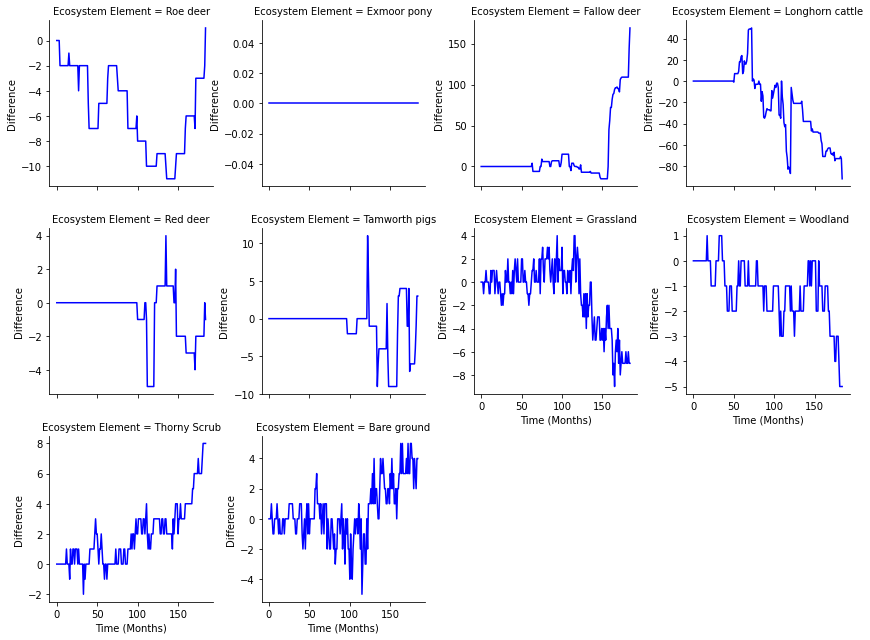

In [ ]:
# graph the accepted outputs - are they acceptable?
palette=['blue', 'yellow', 'green']

# conditions
final_graph = final_df.loc[(final_df['runType'] == "Accepted")]
final_graph = final_graph.reset_index(drop=True)

f = sns.FacetGrid(final_graph, col="Ecosystem Element", hue = "runType", palette = palette, col_wrap=4, sharey = False)
f.map(sns.lineplot, 'Time', 'Difference')


for ax in f.axes.flat:
    ax.set_ylabel('Difference')
    ax.set_xlabel('Time (Months)')